In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset("titanic")
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# datatype of each column
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# describe the dataset
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# show rows and columns
df.shape

(891, 15)

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.isnull().sum().sum()

869

In [ ]:
columns = df.columns
columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.dtypes[df.dtypes == 'object']

sex            object
embarked       object
who            object
embark_town    object
alive          object
dtype: object

In [ ]:
df.dtypes[df.dtypes == 'int64']

survived    int64
pclass      int64
sibsp       int64
parch       int64
dtype: object

In [ ]:
df.dtypes[df.dtypes == 'float64']

age     float64
fare    float64
dtype: object

In [ ]:
df1 = df.drop(["class", "survived", "adult_male", "who", "alone", "fare", "embark_town"], axis = 1)
df1

,pclass,sex,age,sibsp,parch,embarked,deck,alive
0,3,male,22.0,1,0,S,NaN,no
1,1,female,38.0,1,0,C,C,yes
2,3,female,26.0,0,0,S,NaN,yes
3,1,female,35.0,1,0,S,C,yes
4,3,male,35.0,0,0,S,NaN,no
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,S,NaN,no
887,1,female,19.0,0,0,S,B,yes
888,3,female,NaN,1,2,S,NaN,no
889,1,male,26.0,0,0,C,C,yes


In [ ]:
df1.isnull().sum()

pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
deck        688
alive         0
dtype: int64

# Removing Null Values

In [ ]:
# total NaN values
df1.isnull().sum().sum()

867

In [ ]:
# unique values in 'deck'
df1['deck'].unique() # gives the sorted desc order values of the deck

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
# put 'C' in the place of NaN
# replace() method will also work
# df1['deck'].replace(np.nan, "C")

df1['deck'].fillna(value="C", inplace=True)
df1

,pclass,sex,age,sibsp,parch,embarked,deck,alive
0,3,male,22.0,1,0,S,C,no
1,1,female,38.0,1,0,C,C,yes
2,3,female,26.0,0,0,S,C,yes
3,1,female,35.0,1,0,S,C,yes
4,3,male,35.0,0,0,S,C,no
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,S,C,no
887,1,female,19.0,0,0,S,B,yes
888,3,female,NaN,1,2,S,C,no
889,1,male,26.0,0,0,C,C,yes


In [ ]:
df1.isnull().sum()

pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
deck          0
alive         0
dtype: int64

<Axes: xlabel='alive', ylabel='Count'>

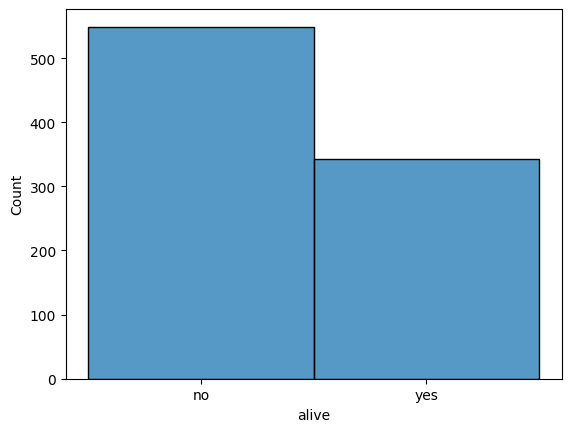

In [ ]:
sns.histplot(df["alive"])

In [ ]:
# mapping alive values as yes=0 and no=1
df1["alive"] = df1["alive"].map({
    "yes": 0,
    "no": 1
})

In [ ]:
# mapping sex values as male=0 and female=1
df1["sex"] = df1["sex"].map({
    "male": 0,
    "female": 1
})

In [ ]:
# mapping deck values as C=0, E=1, G=2, D=3, A=4, B=5, F=6
df1["deck"] = df1["deck"].map({
    "C": 0,
    "E": 1,
    "G": 2,
    "D": 3,
    "A": 4,
    "B": 5,
    "F": 6
})

In [ ]:
df1.head()

,pclass,sex,age,sibsp,parch,embarked,deck,alive
0,3,0,22.0,1,0,S,0,1
1,1,1,38.0,1,0,C,0,0
2,3,1,26.0,0,0,S,0,0
3,1,1,35.0,1,0,S,0,0
4,3,0,35.0,0,0,S,0,1


In [ ]:
df1 = df1.drop(["age", "sibsp", "parch", "embarked"], axis=1)
df1.head()

,pclass,sex,deck,alive
0,3,0,0,1
1,1,1,0,0
2,3,1,0,0
3,1,1,0,0
4,3,0,0,1


# Splitting and ready the data for Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
y = df1["alive"] # dependent variable
x = df1[["pclass", "sex", "deck"]] # independent variable

In [ ]:
x.shape

(891, 3)

In [ ]:
y.shape

(891,)

In [ ]:
# getting train and test data of x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# creating the model (object of LogisticRegression)
log_model = LogisticRegression()

# fitting the trainning data to the model
log_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# predicted value
y_pred = log_model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
# checking the accuracy of the model
log_acc = round(accuracy_score(y_pred, y_test)*100, 2)
print("The accuracy of Logistic Regression: ", log_acc)

The accuracy of Logistic Regression:  79.66


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating the model (object of DecisionTreeClassifier)
dtree_model = DecisionTreeClassifier()

# fitting the trainning data to the model
dtree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# predicted value
y_pred = dtree_model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
# checking the accuracy of the model
dtree_acc = round(accuracy_score(y_pred, y_test)*100, 2)
print("The accuracy of Decision Tree Classifier: ", dtree_acc)

The accuracy of Decision Tree Classifier:  76.95


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating the model (object of RandomForestClassifier)
rfc_model = RandomForestClassifier()

# fitting the trainning data to the model
rfc_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# predicted value
y_pred = rfc_model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
# checking the accuracy of the model
rfc_acc = round(accuracy_score(y_pred, y_test)*100, 2)
print("The accuracy of Random Forest Classifier: ", rfc_acc)

The accuracy of Random Forest Classifier:  76.95


# K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# creating the model (object of LogisticRegression)
knn_model = KNeighborsClassifier()

# fitting the trainning data to the model
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# predicted value
y_pred = knn_model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
knn_acc = round(accuracy_score(y_pred, y_test)*100, 2)
print("The accuracy of K Neighbors Classifier: ", knn_acc)

The accuracy of K Neighbors Classifier:  77.29


# Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

# creating the model (SVC)'
svm_model = svm.SVC()

# fitting the trainning data to the model
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
# predicted value
y_pred = svm_model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
# checking the accuracy of the model
svm_acc = round(accuracy_score(y_pred, y_test)*100, 2)
print("The accuracy of Support Vector Machine: ", svm_acc)

The accuracy of Support Vector Machine:  79.66


# Model Selection

In [ ]:
models = pd.DataFrame({
    'model': [
        'Logistic Regression',
        'Support Vector Machine',
        'K Nearest Neighbour',
        'Decision Tree Classifier',
        'Random Forest Classifier'
    ],

    'score': [
        log_acc,
        svm_acc,
        knn_acc,
        dtree_acc,
        rfc_acc
    ]
})

models.sort_values(by='score', ascending=False)

,model,score
0,Logistic Regression,79.66
1,Support Vector Machine,79.66
2,K Nearest Neighbour,77.29
3,Decision Tree Classifier,76.95
4,Random Forest Classifier,76.95
